#Imports

In [1]:
#import required libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

#Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Load Train, Validation, and Test Data from Google Drive Folders

Based on descriptions and code from https://vijayabhaskar96.medium.com/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720

In [3]:
#Get user directory set up and parameters for data
batch_size =  5 #@param
class_names = ['myotis_382', 'kerivoula_250', 'rhinolophys_907', 'hipposideros_785'] #@param

train_data_dir = '/content/drive/My Drive/Colab Notebooks/Deep Learning/ChiroVox_Bat_Spectrograms_Train_Test_Folders_More_Data/train' #@param jenelle
valid_data_dir = '/content/drive/My Drive/Colab Notebooks/Deep Learning/ChiroVox_Bat_Spectrograms_Train_Test_Folders_More_Data/val' #@param jenelle
test_data_dir = '/content/drive/My Drive/Colab Notebooks/Deep Learning/ChiroVox_Bat_Spectrograms_Train_Test_Folders_More_Data/test' #@param jenelle

#normalizes the images on the [0,255] scale
train_datagen = ImageDataGenerator(rescale=1.0 / 255)
valid_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

#set up connection to training data folder
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=42
    )

#set up connection to validation data folder
valid_generator = valid_datagen.flow_from_directory(
    valid_data_dir,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

#set up connection to test data folder
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    seed=42
)


Found 1363 images belonging to 4 classes.
Found 194 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


#Build and Train a Model

Compile the Model and Print Summary

In [4]:
#load EfficientNetB0 from keras
model = tf.keras.applications.EfficientNetB0(
    input_tensor=None,
    input_shape=None,
    weights = None,
    pooling=None,
    classes=len(class_names),
    classifier_activation="softmax",
)

#use adam optimizer, categorical_crossentropy loss, and measure accuracy
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

#print model summary
model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 225, 225, 3)  0           ['normalization[0][0

Train the model

In [5]:
#train the model, saving the weights to google drive
checkpoint = keras.callbacks.ModelCheckpoint(filepath="/content/drive/My Drive/Colab Notebooks/Deep Learning/EfficientNet_Weights/", save_weights_only=True) #saves models at file path 

#use the train_generator to get data from the training folder
train_model_stats = model.fit_generator(  
     generator=train_generator,  
     epochs=20,  
     verbose=1,
     validation_data = valid_generator,
     callbacks=[checkpoint]) 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/20
273/273 [==============================] - 479s 2s/step - loss: 2.5536 - accuracy: 0.3140 - val_loss: 1.8918 - val_accuracy: 0.3814
Epoch 2/20
273/273 [==============================] - 32s 118ms/step - loss: 1.4020 - accuracy: 0.4116 - val_loss: 2.1827 - val_accuracy: 0.3196
Epoch 3/20
273/273 [==============================] - 31s 113ms/step - loss: 1.2524 - accuracy: 0.4585 - val_loss: 1.0585 - val_accuracy: 0.5258
Epoch 4/20
273/273 [==============================] - 36s 131ms/step - loss: 1.0500 - accuracy: 0.5371 - val_loss: 0.8225 - val_accuracy: 0.6546
Epoch 5/20
273/273 [==============================] - 38s 140ms/step - loss: 0.9006 - accuracy: 0.6324 - val_loss: 0.7984 - val_accuracy: 0.7010
Epoch 6/20
273/273 [==============================] - 37s 137ms/step - loss: 0.7959 - accuracy: 0.6816 - val_loss: 0.8880 - val_accuracy: 0.7165
Epoch 7/20
273/273 [==============================] - 37s 134ms/step - loss: 0.6961 - accuracy: 0.7329 - val_loss: 0.7660 - val_accu

In [6]:
#return the final validation accuracy
model.evaluate_generator(generator=valid_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[1.1734747886657715, 0.7319587469100952]

Plot Training and Validation Curves

{'loss': [2.5535507202148438, 1.402022361755371, 1.2524423599243164, 1.0500377416610718, 0.9005554914474487, 0.7959259152412415, 0.6960909366607666, 0.6499715447425842, 0.5456770062446594, 0.4548529386520386, 0.43217241764068604, 0.3911494314670563, 0.2918376624584198, 0.32904553413391113, 0.2806755304336548, 0.2386985719203949, 0.20921476185321808, 0.22469927370548248, 0.20775774121284485, 0.22311542928218842], 'accuracy': [0.31401321291923523, 0.4115920662879944, 0.45854732394218445, 0.5370506048202515, 0.6324284672737122, 0.6815847158432007, 0.7329420447349548, 0.7439471483230591, 0.794570803642273, 0.8297872543334961, 0.8532648682594299, 0.8745414614677429, 0.898752748966217, 0.882611870765686, 0.9016874432563782, 0.931034505367279, 0.9347028732299805, 0.9273660778999329, 0.9405722618103027, 0.9303008317947388], 'val_loss': [1.8917694091796875, 2.182663917541504, 1.0585448741912842, 0.8224614858627319, 0.7984079718589783, 0.8880149722099304, 0.7660477757453918, 0.8360733389854431, 

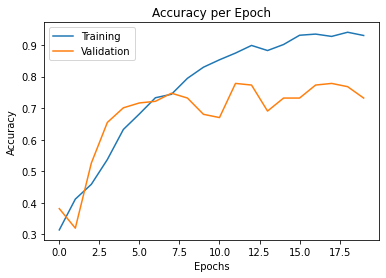

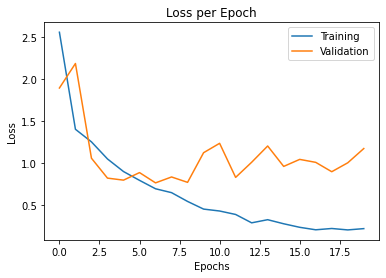

In [7]:
#graph the training and validation accuracy and loss
print(train_model_stats.history)
plt.plot(train_model_stats.history['accuracy'])
plt.plot(train_model_stats.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch')
plt.legend(['Training', 'Validation'])
plt.show()

plt.plot(train_model_stats.history['loss'])
plt.plot(train_model_stats.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.legend(['Training', 'Validation'])
plt.show()



#Save the Results, Calculate Precision, Recall, F1 Score, and Accuracy

Save the results

In [8]:
#reset the test_generator to ensure this is the first time looking at the test data
test_generator.reset()

#make predictions on the test data
pred = model.predict_generator(generator=test_generator, verbose=1)

#translate the numeric predictions into the labels
predicted_class_indices=np.argmax(pred,axis=1)

labels = (test_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

predictions = [labels[k] for k in predicted_class_indices]

#save the predictions to a csv
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("/content/drive/My Drive/Colab Notebooks/Deep Learning/EfficientNet_results.csv",index=False)

results[['Ground_Truth', 'Image_Name']] = results['Filename'].str.split('/', 1, expand=True)

print(results.head())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


79/79 [==============================] - 180s 2s/step
                                  Filename       Predictions  \
0  hipposideros_785/A000313_DFGFZKQEJQ.png  hipposideros_785   
1  hipposideros_785/A000318_JFBBFZRYOG.png   rhinolophus_907   
2  hipposideros_785/A000397_UTOBGDJZNS.png        myotis_364   
3  hipposideros_785/A000421_KHVOXBEYKG.png  hipposideros_785   
4  hipposideros_785/A000428_EMDWTZHGQM.png   rhinolophus_907   

       Ground_Truth              Image_Name  
0  hipposideros_785  A000313_DFGFZKQEJQ.png  
1  hipposideros_785  A000318_JFBBFZRYOG.png  
2  hipposideros_785  A000397_UTOBGDJZNS.png  
3  hipposideros_785  A000421_KHVOXBEYKG.png  
4  hipposideros_785  A000428_EMDWTZHGQM.png  


Calculate the Precision, Recall, and F1 Score

In [9]:
#re-encode the labels to get precision, recall, and f1 score
label_map = dict((v,k) for k,v in labels.items())
results_encoded = results.copy()
results_encoded = results_encoded.replace({'Predictions':label_map})
results_encoded = results_encoded.replace({'Ground_Truth':label_map})

print(results_encoded.head())

#y-axis is actual x-axis is predicted and order goes:
cm=confusion_matrix(results_encoded['Ground_Truth'].values, results_encoded['Predictions'].values)
print('===============CONFUSION MATRIX===============')
print(cm)

FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

precision = TP / (TP + FP)
recall = TP / (TP + FN)
print('\n==================PRECISION==================')
print(precision)
print('\n===================RECALL===================')
print(recall)

f1_score = 2 * ( (precision * recall) / (precision + recall) )
print('\n==================F1 SCORE==================')
print(f1_score)

print('\n==================ACCURACY==================')
print(ACC)

                                  Filename  Predictions  Ground_Truth  \
0  hipposideros_785/A000313_DFGFZKQEJQ.png            0             0   
1  hipposideros_785/A000318_JFBBFZRYOG.png            3             0   
2  hipposideros_785/A000397_UTOBGDJZNS.png            2             0   
3  hipposideros_785/A000421_KHVOXBEYKG.png            0             0   
4  hipposideros_785/A000428_EMDWTZHGQM.png            3             0   

               Image_Name  
0  A000313_DFGFZKQEJQ.png  
1  A000318_JFBBFZRYOG.png  
2  A000397_UTOBGDJZNS.png  
3  A000421_KHVOXBEYKG.png  
4  A000428_EMDWTZHGQM.png  
===============CONFUSION MATRIX===============
[[74  9 17 50]
 [23  3  7 17]
 [33  1 11 24]
 [50  6 24 45]]

==================PRECISION==================
[0.41111111 0.15789474 0.18644068 0.33088235]

===================RECALL===================
[0.49333333 0.06       0.15942029 0.36      ]

==================F1 SCORE==================
[0.44848485 0.08695652 0.171875   0.34482759]

=======

Evaluate the model on the test data to get a final accuracy 




In [10]:
model.evaluate_generator(generator=test_generator, verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


79/79 [==============================] - 7s 83ms/step - loss: 1.3434 - accuracy: 0.7386


[1.3433825969696045, 0.7385786771774292]